animation se déroulant sur 174.3 secondes


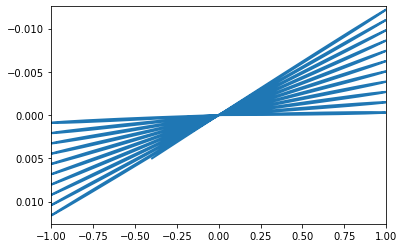

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

Trot = 23*3600+56*60+4 #jour sidéral
Trot_pendulaire = Trot/np.sin(48.846222) #latitude du panthéon
Tpendule = 16.5 #estimation 


totime = abs(Trot_pendulaire)/500
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( -1, 1))
ax.set_ylim((-np.sin(2*np.pi*totime/Trot_pendulaire), np.sin(2*np.pi*totime/Trot_pendulaire)))

line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return (line,)

# animation function. This is called sequentially



def animate(i):
    t = (totime/100)*np.linspace(0, (i+1), 1000)
    x = np.cos(2*np.pi*t/Trot_pendulaire)*np.sin(2*np.pi*t/Tpendule)
    y = np.sin(2*np.pi*t/Trot_pendulaire)*np.sin(2*np.pi*t/Tpendule)
    
    line.set_data(x, y)
    return (line,)

# call the animator. blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=False)


print("animation se déroulant sur {} secondes".format(str(round(totime,1))))
HTML(anim.to_html5_video())
